In [ ]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP, #
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO     #
# DESTE EP.                                                      #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,   #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM          #
# DESONESTIDADE ACADÊMICA OU PLÁGIO.                             #
#                                                                #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS        #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A          #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E        #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS    #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP.                           #
#                                                                #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO         #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR             #
# DESONESTIDADE ACADÊMICA.                                       #
#                                                                #
#                                                                #
# Nome : Eike Souza da Silva                                     #
# NUSP : 4618653                                                 #
# Turma:                                                         #
# Prof.: Ronaldo Fumio Hashimoto                                 #
##################################################################

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from cv2 import resize

In [2]:
!git clone https://github.com/eike012/mac0417.git

Cloning into 'mac0417'...
remote: Enumerating objects: 386, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 386 (delta 0), reused 264 (delta 0), pack-reused 122
Receiving objects: 100% (386/386), 197.43 MiB | 24.46 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [4]:
def meanHist(img):
  L = 256
  hist, bins = np.histogram(img.flatten(), L, [0, L])

  return hist

def callMeanHist(path):
  count_files = 0
  sum_hist_img = 0
  for image in os.listdir(path):
    conc_path = os.path.join(path, image)
    img = cv2.imread(conc_path, cv2.IMREAD_GRAYSCALE)
    hist_img = meanHist(img)
    sum_hist_img += hist_img.flatten()
    count_files += 1

  hist_media = sum_hist_img / count_files
  return hist_media

In [5]:
def equalHist(img,pathToSave):
    L = 256
    M, N = img.shape
    os.chdir(pathToSave)
    hist, bins = np.histogram(img.flatten(), L, [0, L])
    pr = hist / (M * N)
    accumu = pr.cumsum()

    sk = np.floor((L - 1) * accumu).astype(np.uint8)
    img_equalized = sk[img]

    return img_equalized

In [16]:
def plotHistogram(histo, title):
  plt.bar(range(256), histo, width=1.0, edgecolor='black')
  plt.title(title)
  plt.xlabel('Pixel Intensity')
  plt.ylabel('Frequency')
  plt.show()

In [6]:
os.mkdir('/content/mac0417/EP2/normalizedDataset')
os.mkdir('/content/mac0417/EP2/normalizedDataset/Laplacian')
os.mkdir('/content/mac0417/EP2/normalizedDataset/contrastStretched')
os.mkdir('/content/mac0417/EP2/normalizedDataset/logTransformation')
os.mkdir('/content/mac0417/EP2/normalizedDataset/meanFilter')
os.mkdir('/content/mac0417/EP2/normalizedDataset/originalGrayDataset')
os.mkdir('/content/mac0417/EP2/normalizedDataset/powerLawTransformation')

In [7]:
def calleqHist(path):
  last_part = path.split('/')[-1]
  pathToSave = '/content/mac0417/EP2/normalizedDataset/' + last_part
  count_files = 0
  for image in os.listdir(path):
    conc_path = os.path.join(path, image)
    img = cv2.imread(conc_path, cv2.IMREAD_GRAYSCALE)
    equal_img = equalHist(img, pathToSave)
    cv2.imwrite(f'{image}', equal_img)

In [8]:
calleqHist('/content/mac0417/EP2/analysisData/Laplacian')

In [9]:
calleqHist('/content/mac0417/EP2/analysisData/contrastStretched')

In [10]:
calleqHist('/content/mac0417/EP2/analysisData/logTransformation')

In [11]:
calleqHist('/content/mac0417/EP2/analysisData/meanFilter')

In [12]:
calleqHist('/content/mac0417/EP2/analysisData/originalGrayDataset')

In [13]:
calleqHist('/content/mac0417/EP2/analysisData/powerLawTransformation')

In [14]:
hist_laplacian = callMeanHist('/content/mac0417/EP2/analysisData/Laplacian')

In [15]:
hist_gray = callMeanHist('/content/mac0417/EP2/analysisData/originalGrayDataset')

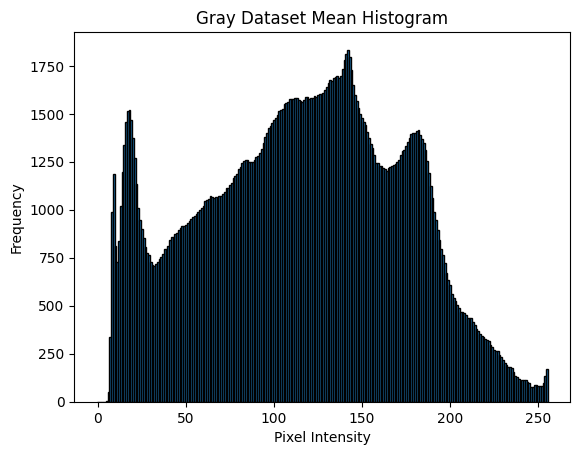

In [38]:
plotHistogram(hist_gray,'Gray Dataset Mean Histogram')

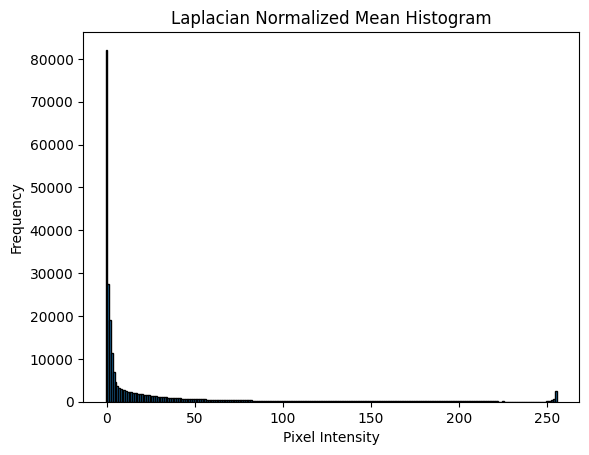

In [17]:
plotHistogram(hist_laplacian, 'Laplacian Mean Histogram')

In [18]:
hist_contrast = callMeanHist('/content/mac0417/EP2/analysisData/contrastStretched')

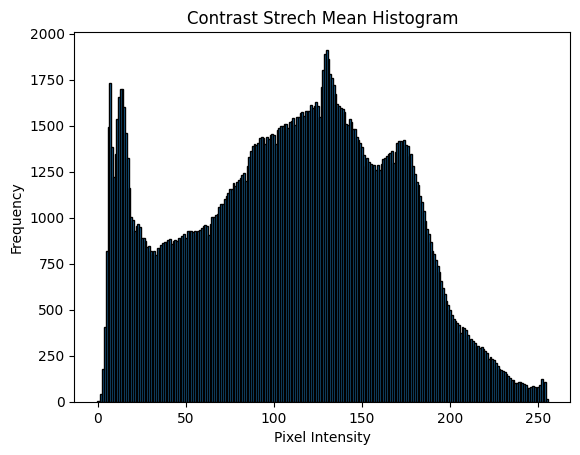

In [19]:
plotHistogram(hist_contrast, 'Contrast Strech Mean Histogram')

In [20]:
log_hist = callMeanHist('/content/mac0417/EP2/analysisData/logTransformation')

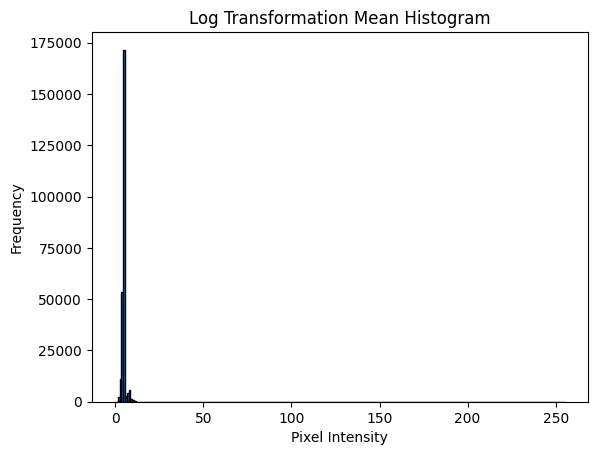

In [21]:
plotHistogram(log_hist, 'Log Transformation Mean Histogram')

In [22]:
mean_hist = callMeanHist('/content/mac0417/EP2/analysisData/meanFilter')

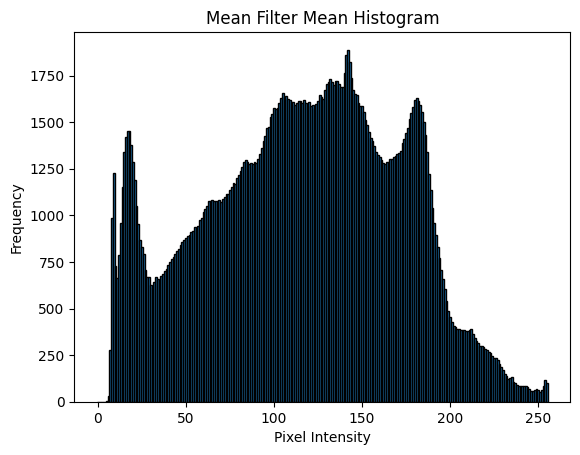

In [23]:
plotHistogram(mean_hist, 'Mean Filter Mean Histogram')

In [24]:
powerLaw_hist = callMeanHist('/content/mac0417/EP2/analysisData/powerLawTransformation')

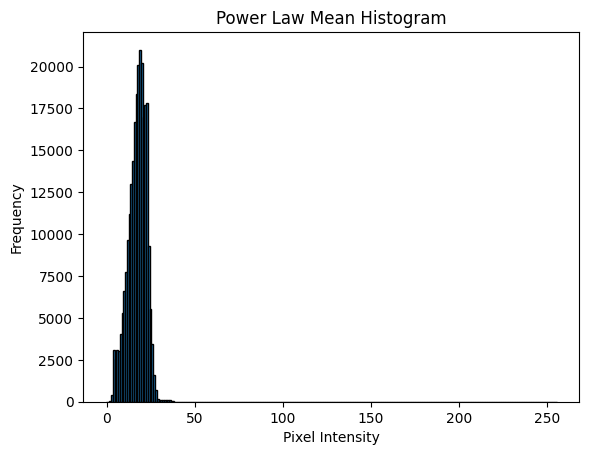

In [25]:
plotHistogram(powerLaw_hist, 'Power Law Mean Histogram')

In [26]:
normalizedLaplacianHist = callMeanHist('/content/mac0417/EP2/normalizedDataset/Laplacian')

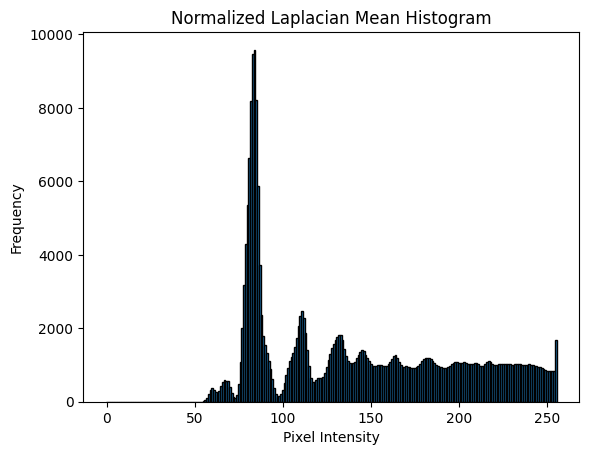

In [27]:
plotHistogram(normalizedLaplacianHist, 'Normalized Laplacian Mean Histogram')

In [28]:
normalizedContrastStHist = callMeanHist('/content/mac0417/EP2/normalizedDataset/contrastStretched')

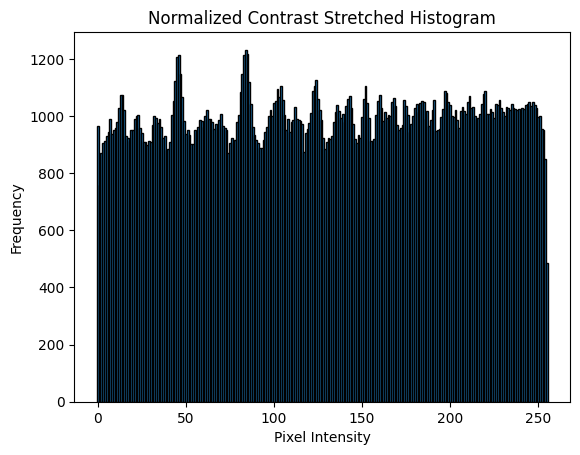

In [29]:
plotHistogram(normalizedContrastStHist, 'Normalized Contrast Stretched Histogram')

In [30]:
normalizedlogHist = callMeanHist('/content/mac0417/EP2/normalizedDataset/logTransformation')

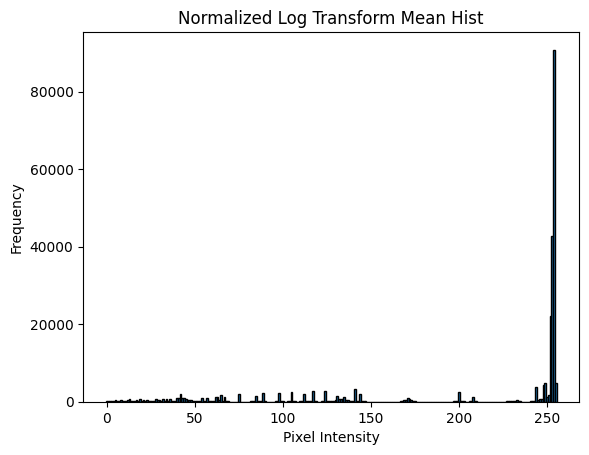

In [31]:
plotHistogram(normalizedlogHist, 'Normalized Log Transform Mean Hist')

In [32]:
normalizedMeanFilterHist = callMeanHist('/content/mac0417/EP2/normalizedDataset/meanFilter')

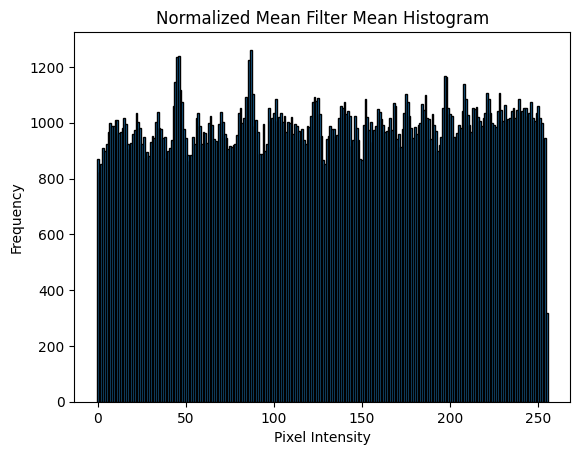

In [33]:
plotHistogram(normalizedMeanFilterHist, 'Normalized Mean Filter Mean Histogram')

In [34]:
normalizedOgDs = callMeanHist('/content/mac0417/EP2/normalizedDataset/originalGrayDataset')

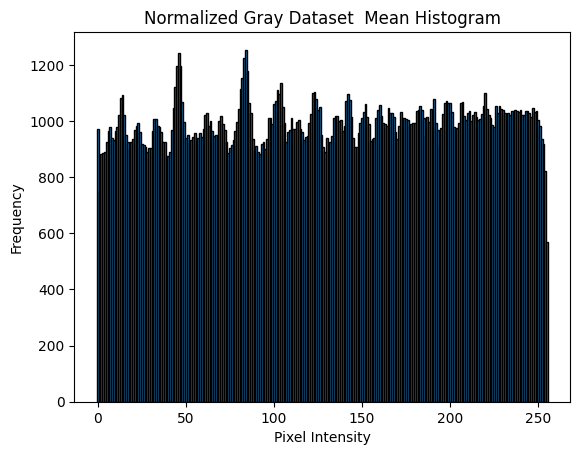

In [35]:
plotHistogram(normalizedOgDs, 'Normalized Gray Dataset  Mean Histogram')

In [36]:
normalized_powerhist = callMeanHist('/content/mac0417/EP2/normalizedDataset/powerLawTransformation')

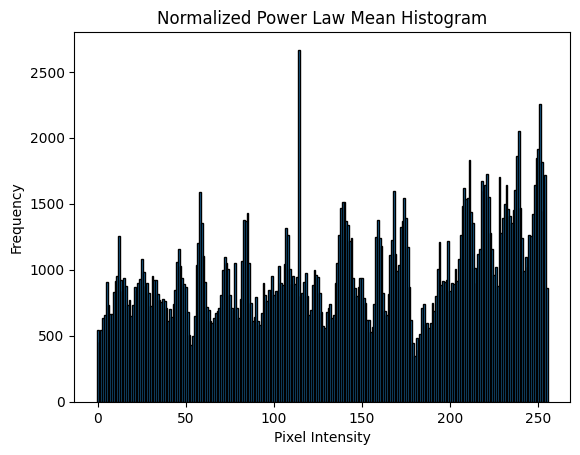

In [37]:
plotHistogram(normalized_powerhist, 'Normalized Power Law Mean Histogram')

###Ao analisar os Histogramas dos Datasets, tanto das imagens normalizadas quanto das que passaram pelos processamentos da parte anterior, é possível notar que a equalização de histograma permitiu uma maior concentração de intensidades altas, quando levamos em consideração o Laplaciano e o Power-Law, este último tendo uma distribuição de pixels mais equilibrada ao normalizá-lo. Note também que o Mean Filter e o Contrast-Stretch possuem histogramas com intensidades melhor distribuidas em comparação com as outras transformações.